# Einleitung

Dieses kleine Jupyter-Notebook soll zeigen, wie man ein kleines Neuronales Netz - ein sog. "Perzeptron" - selber in Python programmieren, trainieren und anwenden kann.

# Einlesen eines Datensatzes

In [1]:
import tensorflow as tf

2022-10-05 20:54:13.059887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-10-05 20:54:13.059913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train.ndim

3

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Visualisieren einiger Bilder

In [11]:
bild = x_train[0, :, :]

In [12]:
type(bild)

numpy.ndarray

In [13]:
bild.shape

(28, 28)

In [14]:
bild

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
from matplotlib import pyplot as plt

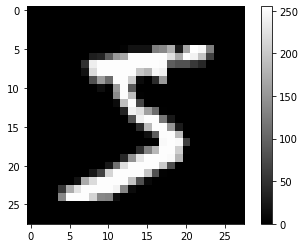

In [16]:
plt.imshow(bild, cmap="gray")
plt.colorbar()

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Vorbereitung der Implementierung

## Erzeugen der Targets

In [18]:
y_train[:30]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7], dtype=uint8)

In [19]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit(labels.reshape(-1,1))
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung

In [20]:
one_hot_kodierung = one_hot(y_train)

In [21]:
one_hot_kodierung[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Bilder sind 2D Inputs, KNN erwartet 1D Input

In [22]:
bild.shape

(28, 28)

In [23]:
28*28

784

In [24]:
v = bild.reshape(-1)

In [25]:
v

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [26]:
v.shape

(784,)

In [27]:
type(v)

numpy.ndarray

In [28]:
v.ndim

1

In [29]:
bild.ndim

2

In [30]:
import numpy as np
v_mit_bias_input = np.append(v, [1])

In [31]:
v_mit_bias_input.shape

(785,)

In [32]:
v_mit_bias_input

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Erzeugen einer Gewichtsmatrix

In [33]:
nr_inputs = 28**2 + 1

In [34]:
nr_inputs

785

In [35]:
nr_outputs = 10

In [36]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [37]:
W.shape

(785, 10)

In [38]:
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
low = -0.1
high = +0.1
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )

In [40]:
W.shape

(785, 10)

In [41]:
W

array([[-0.03371315, -0.01901974, -0.04814605, ..., -0.02776588,
         0.00562357,  0.0603357 ],
       [-0.03268141, -0.06194109, -0.08150492, ...,  0.05593409,
         0.06588638,  0.00395976],
       [ 0.09412188, -0.00018931, -0.08289176, ...,  0.07311855,
        -0.05191864,  0.09432571],
       ...,
       [ 0.01676563,  0.0651771 ,  0.0261138 , ...,  0.09960577,
         0.05045266,  0.01502384],
       [-0.05147481,  0.05497471, -0.03215917, ...,  0.01283693,
        -0.05619511,  0.0631773 ],
       [-0.06334359,  0.02942766, -0.09066999, ...,  0.0543012 ,
         0.09817443,  0.00574459]])

## Berechnung des Aktivierungsvektors

In [42]:
v_mit_bias_input.shape

(785,)

In [43]:
inp_matrix = v_mit_bias_input.reshape(1,785)

In [44]:
inp_matrix.ndim

2

In [45]:
inp_matrix.shape

(1, 785)

In [46]:
W.shape

(785, 10)

In [47]:
act = np.matmul(inp_matrix, W)

In [48]:
act.shape

(1, 10)

In [49]:
act

array([[ 195.72357889, -150.12351949,  -52.06000462,   67.62308893,
         213.8711182 ,   47.75877654, -164.52633605,   66.34252658,
          -3.3041268 ,  161.69324706]])

## Berechnung des Outputvektors

In [50]:
def RELU(x):
    if x < 0:
        return 0
    else:
        return x

In [51]:
RELU(-0.5)

0

In [52]:
RELU(2.4)

2.4

In [53]:
type(act)

numpy.ndarray

In [54]:
act.shape

(1, 10)

In [55]:
# RELU(act)

In [56]:
RELU_vecfunc = np.vectorize(RELU, otypes=[float] )

In [57]:
out = RELU_vecfunc(act)

In [58]:
out

array([[195.72357889,   0.        ,   0.        ,  67.62308893,
        213.8711182 ,  47.75877654,   0.        ,  66.34252658,
          0.        , 161.69324706]])

In [59]:
np.argmax(out)

4

In [60]:
act

array([[ 195.72357889, -150.12351949,  -52.06000462,   67.62308893,
         213.8711182 ,   47.75877654, -164.52633605,   66.34252658,
          -3.3041268 ,  161.69324706]])

## Berechnung des Fehlervektors

In [61]:
out

array([[195.72357889,   0.        ,   0.        ,  67.62308893,
        213.8711182 ,  47.75877654,   0.        ,  66.34252658,
          0.        , 161.69324706]])

In [62]:
out.shape

(1, 10)

In [63]:
out1D = out.reshape(-1)

In [64]:
out1D

array([195.72357889,   0.        ,   0.        ,  67.62308893,
       213.8711182 ,  47.75877654,   0.        ,  66.34252658,
         0.        , 161.69324706])

In [65]:
out1D.shape

(10,)

In [66]:
target_vector = one_hot_kodierung[0,:]

In [67]:
target_vector.shape

(10,)

In [68]:
target_vector

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [69]:
error_vector = target_vector - out1D

In [70]:
error_vector

array([-195.72357889,    0.        ,    0.        ,  -67.62308893,
       -213.8711182 ,  -46.75877654,    0.        ,  -66.34252658,
          0.        , -161.69324706])

## Berechnung aller Gewichtsänderungen

In [71]:
nr_outputs

10

In [72]:
nr_inputs

785

In [73]:
v_mit_bias_input.shape

(785,)

In [74]:
alpha = 0.001

for out_neuron_nr in range(0,nr_outputs):
    for inp_nr in range(0,nr_inputs):
        weight = W[inp_nr, out_neuron_nr]
        
        # Compute weight change for the current weight
        # based on the Perceptron Learning Rule
        delta_weight = v_mit_bias_input[inp_nr] * error_vector[out_neuron_nr] * alpha
        
        # Learning happens here!
        W[inp_nr, out_neuron_nr] += delta_weight        

# Einzelteile zusammensetzen zu einem Programm

In [75]:
import tensorflow as tf
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder


def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit(labels.reshape(-1,1))
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung


def act_func_relu_scalar(x):
    if x < 0:
        return 0
    else:
        return x
    
act_func_relu_vector = np.vectorize(act_func_relu_scalar, otypes=[float] )


def preprocess_data(M):
    M = M.astype(float)
    M = M * (1.0/255.0)
    return M    


def prepare_data():
    
    # 1. load MNIST data
    mnist_dataset = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
    
    # 2. map image pixel values from [0,255] to [0,1]
    x_train = preprocess_data(x_train)
    x_test  = preprocess_data(x_test)
        
    # 3. map train data target labels to one-hot encoded vectors
    y_train_onehot = one_hot(y_train)
    
    # 4. map test data target labels to one-hot encoded vectors
    y_test_onehot = one_hot(y_test)
    
    return x_train, y_train_onehot, \
           x_test,  y_test_onehot


def perceptron_predict(image,W):
        
    # 1. transform 2D input image (28x28 pixel) to 1D vector
    v = image.reshape(-1)
    
    # 2. add bias input to input vector v
    v_mit_bias_input = np.append(v, [1])
    
    # 3. compute activations of all <nr_outputs> output neurons
    act = np.matmul(v_mit_bias_input, W)
        
    # 4. compute output vector given activation vector
    out = act_func_relu_vector(act)
    
    return v_mit_bias_input, out
    
    

def preceptron_train(v_with_add_bias_input,y,t,W):
    
    # 1. compute error for each of the output neurons
    error_vector = t - y
    
    # 2. define learning rate
    alpha = 0.001
    
    # 3. for all output neurons ...
    for out_neuron_nr in range(0,nr_outputs):
        
        # for all inputs of that output neuron ...
        for inp_nr in range(0,nr_inputs):
            
            # compute weight change for the current weight
            # based on the Perceptron learning rule
            delta_weight = v_with_add_bias_input[inp_nr] *  \
                           error_vector[out_neuron_nr] *    \
                           alpha

            # Learning happens here!
            W[inp_nr, out_neuron_nr] += delta_weight

            
            
def perceptron_test(x_test, y_test, W):
    
    nr_test_samples = x_test.shape[0]
    
    correct = 0
    for sample_id in range(0,nr_test_samples):

        # get next test sample
        image       = x_test[sample_id]
        teacher_vec = y_test[sample_id]
        
        # compute prediction vector
        _, pred_vec = perceptron_predict(image,W)
        
        # compute predicted label
        pred_label = np.argmax(pred_vec)
        
        # get actual label
        gt_label = np.argmax(teacher_vec)
        
        #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))
        
        # was the predicted label correct?
        if pred_label == gt_label:
            correct += 1
            
    acc = correct/nr_test_samples
    return acc

# Trainieren des Perzeptrons

In [76]:
# 1. get training data
x_train, y_train, x_test, y_test = prepare_data()


# 2. prepare a weight matrix for the Perceptron
nr_inputs = 28**2 + 1
nr_outputs = 10
low = -1.0
high = +1.0
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )


# 3. training
nr_train_samples = x_train.shape[0]
accs = []
HOW_MANY_STEPS_TO_TRAIN = 40000
    
# for each training sample in the training dataset ...
correct = 0    
for train_step_nr in range(0,HOW_MANY_STEPS_TO_TRAIN):

    # get next training sample
    sample_id   = np.random.randint(0,nr_train_samples)
    image       = x_train[sample_id]
    teacher_vec = y_train[sample_id]

    # compute prediction vector
    v_with_add_bias_input, pred_vec = perceptron_predict(image,W)

    # compute predicted label
    pred_label = np.argmax(pred_vec)

    # get actual label
    gt_label = np.argmax(teacher_vec)

    #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))

    if pred_label == gt_label:
        correct += 1

    # adapt weights due to error
    # and according to Perceptron learning rule?        
    preceptron_train(v_with_add_bias_input,pred_vec,teacher_vec,W)

    if train_step_nr % 100 == 0:
        acc = perceptron_test(x_test, y_test, W)
        print("train step: {0} --> test data set accuracy: {1:.3f}".format(train_step_nr, acc))

        accs.append(acc)

print("\nfinished!")

train step: 0 --> test data set accuracy: 0.111
train step: 100 --> test data set accuracy: 0.134
train step: 200 --> test data set accuracy: 0.143
train step: 300 --> test data set accuracy: 0.137
train step: 400 --> test data set accuracy: 0.137
train step: 500 --> test data set accuracy: 0.139
train step: 600 --> test data set accuracy: 0.137
train step: 700 --> test data set accuracy: 0.141
train step: 800 --> test data set accuracy: 0.143
train step: 900 --> test data set accuracy: 0.150
train step: 1000 --> test data set accuracy: 0.152
train step: 1100 --> test data set accuracy: 0.155
train step: 1200 --> test data set accuracy: 0.156
train step: 1300 --> test data set accuracy: 0.156
train step: 1400 --> test data set accuracy: 0.162
train step: 1500 --> test data set accuracy: 0.163
train step: 1600 --> test data set accuracy: 0.169
train step: 1700 --> test data set accuracy: 0.175
train step: 1800 --> test data set accuracy: 0.181
train step: 1900 --> test data set accuracy

In [77]:
W.flatten().shape

(7850,)

In [78]:
W.flatten().min()

-1.4243514427526442

In [79]:
W.flatten().max()

1.1425106540632242

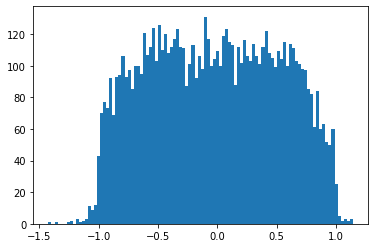

In [80]:
from matplotlib import pyplot as plt
plt.hist( W.flatten(), bins=100 )
plt.show()

# Plotten der Lernkurve

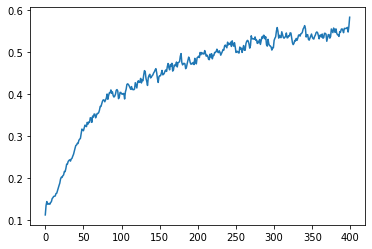

In [81]:
from matplotlib import pyplot as plt
plt.plot(accs)
plt.show()

# Abspeichern der gelernten Gewichte

In [82]:
import pickle
fname = "perceptron_weights.pkl"
fobj = open(fname, "wb")
pickle.dump(W, fobj)
fobj.close()

# Wiederherstellen der Gewichte

In [83]:
# das Notebook kann jetzt geschlossen werden bzw.
# der Python-Kernel kann neu gestartet werden
# die Matrix W wird dadurch "vergessen":
W

array([[ 0.33703436, -0.92921859,  0.77584359, ..., -0.6196178 ,
        -0.16947373, -0.20652987],
       [-0.39472858,  0.28494815,  0.44487144, ..., -0.64634774,
         0.68630293, -0.45997351],
       [ 0.67676802,  0.98699254, -0.51020989, ..., -0.53814062,
         0.56538884, -0.67653506],
       ...,
       [ 0.80537741, -0.09022135, -0.99870732, ..., -0.37951325,
        -0.60969272,  0.59410447],
       [-0.70787509,  0.79902006,  0.79901592, ..., -0.19080713,
        -0.5281935 , -0.74372123],
       [ 0.01174531,  0.10442105, -0.28851116, ..., -0.87402385,
        -0.32843346, -1.18633474]])

In [84]:
# jetzt wird die Gewichtsmatrix W wiederhergestellt
import pickle
fname = "perceptron_weights.pkl"
fobj = open(fname, "rb")
W = pickle.load(fobj)

In [85]:
W.shape

(785, 10)

In [86]:
W

array([[ 0.33703436, -0.92921859,  0.77584359, ..., -0.6196178 ,
        -0.16947373, -0.20652987],
       [-0.39472858,  0.28494815,  0.44487144, ..., -0.64634774,
         0.68630293, -0.45997351],
       [ 0.67676802,  0.98699254, -0.51020989, ..., -0.53814062,
         0.56538884, -0.67653506],
       ...,
       [ 0.80537741, -0.09022135, -0.99870732, ..., -0.37951325,
        -0.60969272,  0.59410447],
       [-0.70787509,  0.79902006,  0.79901592, ..., -0.19080713,
        -0.5281935 , -0.74372123],
       [ 0.01174531,  0.10442105, -0.28851116, ..., -0.87402385,
        -0.32843346, -1.18633474]])

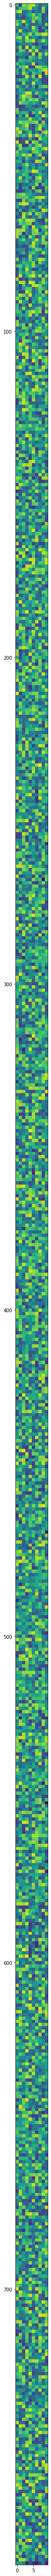

In [87]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,100))
plt.imshow(W)
plt.show()

# Testen des Netzes

In [96]:
import cv2

testbild = x_test[0,:,:]

In [97]:
type(testbild)

numpy.ndarray

In [98]:
testbild.shape

(28, 28)

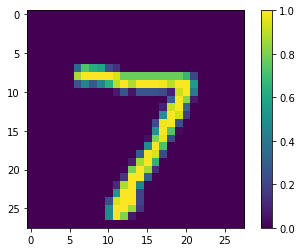

In [99]:
from matplotlib import pyplot as plt
plt.imshow(testbild)
plt.colorbar()

In [100]:
_, pred_vec = perceptron_predict(testbild, W)

In [101]:
pred_vec

array([0.        , 0.        , 0.        , 0.18546896, 0.        ,
       0.        , 0.        , 2.40454294, 0.        , 0.        ])

In [102]:
np.argmax(pred_vec)

7